# PP6 neural networks for tabular data

[![Open in Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PauliusU/PP6-neural-networks-for-tabular-data/blob/master/PP6-neural-networks-for-tabular-data.ipynb)

Project aims to improve model from *P6 L3* based on ```Boston housing``` dataset. <br>

Project is slit into two sections:
 - ```ORIGINAL``` which contains initial results to be improved, and
 - ```SOLUTION``` which contains tuning attempts and improved results.


## ORIGINAL

### Problem statement

Attempt to predict the median price of homes in a given Boston suburb in the
mid-1970s, given data points about the suburb at the time, such as the crime rate, the
local property tax rate, and so on. It  has  relatively  few  data  points:  only  506,  split between 404 training samples and 102 test samples. And each feature in the input data
(for example, the crime rate) has a different scale. For instance, some values are proportions, which take values between 0 and 1; others take values between 1 and 12, others between 0 and 100, and so on.

Reasonable performance for models evaluated using Mean Squared Error (MSE) are around 20 in squared thousands of dollars (or $4,500 if you take the square root). This is a nice target to aim for with our neural network model.

This is a classical dataset, so it is available directly in keras

In [4]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()  # test_split=0.2

57026/57026 [==============================] - 0s 1us/step


In [5]:
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

As  you  can  see,  you  have  404  training  samples  and  102  test  samples,  each  with  13
numerical features, such as per capita crime rate, average number of rooms per dwell-
ing, accessibility to highways, and so on.

  The  targets  are  the  median  values  of  owner-occupied  homes,  in  thousands  of
dollars:

In [7]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

In [8]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

### Preping the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous
data, but it would definitely make learning more difficult. A widespread best practice
to deal with such data is to do feature-wise normalization: **for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and
divide by the standard deviation, so that the feature is centered around 0 and has a
unit standard deviation**. This is easily done in Numpy.

In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities used for normalizing the test data are computed using the
training data. You should **never use in your workflow any quantity computed on the
test data**, even for something as simple as data normalization.

### Building the network

In [10]:
train_data.shape[1]

13

In [11]:
from keras import models
from keras import layers


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # no activation
    # model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends (last layer) with a single unit and no activation (it will be a linear layer). This is
a typical setup for scalar regression (a regression where you’re trying to predict a single
continuous value). Applying an activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer,
the network could only learn to predict values between 0 and 1. Here, because the last
layer is purely linear, the network is free to learn to predict values in any range.

 Note that you compile the network with the mse loss function—mean squared error,
the square of the difference between the predictions and the targets. This is a widely
used loss function for regression problems.
 You’re also monitoring a new metric during training: mean absolute error (MAE). It’s
the  absolute  value  of  the  difference  between  the  predictions  and  the  targets.  For
instance, an MAE of 0.5 on this problem would mean your predictions are off by $500
on average.

### Validating your approach using K-fold validation


To evaluate your network while you keep adjusting its parameters (such as the number of epochs used for training), you could split the data into a training set and a validation set. But because you have so few data points, the validation set would end up being very small (for instance, about 100 examples. As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent you from reliably evaluating your model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. In terms of code, this is straightforward.

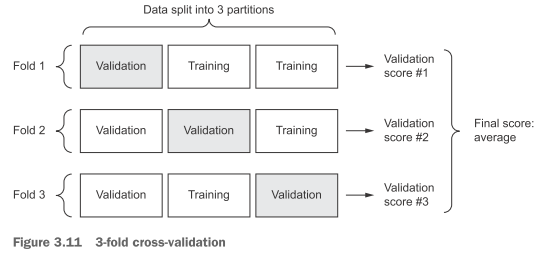

In [12]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 10
all_scores = []

In [13]:
for i in range(k):
    print('processing fold #', i)
    # get the validation portion for the i-th fold
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # get the training portion for the i-th fold
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0


2022-09-13 13:39:54.203540: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores
# [3.8417842388153076, 3.531492233276367, 3.379641056060791, 4.858107089996338]
# [4.329324722290039, 4.655668258666992, 4.1663312911987305, 5.461818695068359]

# [2.0565481185913086, 2.5623867511749268, 2.5385336875915527, 2.680104970932007]
# [2.0525143146514893, 2.4596831798553467, 2.496774196624756, 3.0476107597351074]

[2.070143938064575, 2.680553436279297, 2.6663174629211426, 2.8701910972595215]

In [15]:
np.mean(all_scores)
# 3.902756154537201
# 4.65328574180603

# 2.4593933820724487
# 2.514145612716675

2.571801483631134

The different runs do indeed show rather different validation scores, from 2.1 to 2.6. The average (2.4) is a much more reliable metric than any single score—that’s the entire point of K-fold cross-validation. In this case, you’re off by \$2400 on average, which is significant considering that the prices range from \$5,000 to \$50,000. To understand the significance of this error, we would need to calculate the min() and max() of the target collum - this is obviously what data analysis would tell us.

In [16]:
print(f"min: {min(train_targets)}, max: {max(train_targets)}")
print(f"{np.mean(all_scores) / max(train_targets)} % error")

min: 5.0, max: 50.0
0.05143602967262268 % error


### More epochs?

 Let’s try training the network a bit longer: 500 epochs. To keep a record of how
well the model does at each epoch, you’ll modify the training loop to save the per-
epoch validation score log.

In [17]:
num_epochs = 100  # 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0
    )
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


You can then compute the average of the per-epoch MAE scores for all folds.

In [18]:
print(f"for {len(all_mae_histories)} folds, we have {len(all_mae_histories[0])} entries")

for 4 folds, we have 100 entries


In [19]:
[x[0] for x in all_mae_histories]

[3.660123109817505, 4.227621555328369, 4.367626190185547, 5.470718860626221]

In [20]:
# [4.014741897583008, 4.4268622398376465, 4.434478282928467, 5.382927417755127]

In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Plotting validation scores

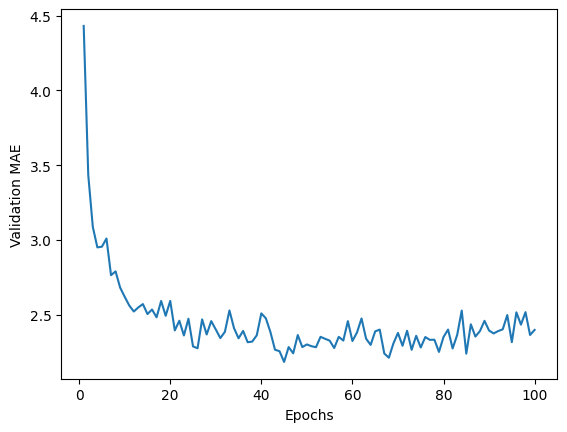

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. Let’s do the following:
- Omit the first 10 data points, which are on a different scale than the rest of the curve.
- Replace each point with an exponential moving average of the previous points,
to obtain a smooth curve.

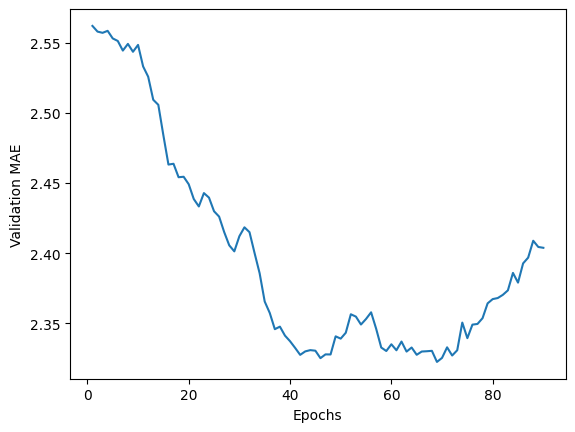

In [23]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


samples_to_skip = 10
smooth_mae_history = smooth_curve(average_mae_history[samples_to_skip:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


According to this plot, it seems that validation MAE stops improving significantly after 45 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [24]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets, epochs=300, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 882us/step - loss: 14.0174 - mae: 2.5831


In [25]:
test_mae_score

2.5830583572387695

We are still off by a bit.

### Intermediate summary
Here's what you should take away from this example:

- Regression is done using different loss functions from classification;
- Mean Squared Error (MSE) is a commonly used loss function for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
- When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
- When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
- When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.

### Code in one place

In [26]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Activation, Dropout
from keras.activations import elu
import numpy as np
from keras.datasets import boston_housing
from sklearn.metrics import r2_score
from keras.layers import BatchNormalization

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [27]:
train_data.shape

(404, 13)

In [28]:
def build_model():
    model = models.Sequential()

    model.add(layers.Dense(32, activation='linear', input_shape=(train_data.shape[1],)))
    # model.add(BatchNormalization(momentum=.5)) # ref: https://stackoverflow.com/a/37979391/1964707
    model.add(Activation(lambda x: elu(x, alpha=0.1)))
    model.add(Dropout(0.4))

    model.add(layers.Dense(32, activation='linear'))
    # model.add(BatchNormalization(momentum=.5))
    model.add(Activation(lambda x: elu(x, alpha=0.1)))
    model.add(Dropout(0.4))

    model.add(layers.Dense(1))
    # no batch norm because no activation function for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


k = 4
num_val_samples = len(train_data) // k
num_epochs = 65
all_scores = []
r2_scores = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=2, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    preds = model.predict(val_data)
    r2_scores.append(r2_score(val_targets, preds))
    all_scores.append(val_mae)

print(np.mean(all_scores))
print(np.mean(r2_scores))

# R^2: bs: 1, rmsprop, ep: 10,  8,  8, no dropout  , no batch norm  -> 0.647
# R^2: bs: 1, rmsprop, ep: 10,  8,  8, dropout .01 , no batch norm  -> 0.580
# R^2: bs: 1, rmsprop, ep: 10,  8,  8, dropout .02 , no batch norm  -> 0.473
# R^2: bs: 1, rmsprop, ep: 10,  8,  8, dropout .04 , no batch norm  -> 0.146
# R^2: bs: 1, rmsprop, ep: 20,  8,  8, dropout .04 , no batch norm  -> 0.508 ; increase in epoch count mitigates the effects of large dropout
# R^2: bs: 1, rmsprop, ep: 10, 16, 16, dropout .04 , no batch norm  -> 0.537 ; increase in neural capacity mitigates the effects of large dropout
# R^2: bs: 1, rmsprop, ep: 10, 16, 16, dropout .04 ,  + batch norm  -> -134K ; batch norm did hurt regression
# R^2: bs: 1,    adam, ep: 10, 16, 16, dropout .04 , no batch norm  -> 0.665 ;
# R^2: bs: 2,    adam, ep: 10, 16, 16, dropout .04 , no batch norm  -> 0.565 ;
# R^2: bs: 5,    adam, ep: 10, 16, 16, dropout .04 , no batch norm  -> 0.460 ; with a large bs we are performing fewer weight adjustments, so we would need to increaase the epoch count!
# R^2: bs: 4,    adam, ep: 40, 16, 16, dropout .04 , no batch norm  -> 0.716 ; testing the 1% bs rule
# R^2: bs: 1, rmsprop, ep: 30, 32, 32, dropout .02 , no batch norm  -> 0.804 ;

# ... trying for the best
# R^2: bs: 2,    adam, ep: 65, 32, 32, dropout .04 , no batch norm  -> 0.830;

processing fold # 0
4/4 [==============================] - 0s 792us/step
processing fold # 1
4/4 [==============================] - 0s 511us/step
processing fold # 2
4/4 [==============================] - 0s 717us/step
processing fold # 3
4/4 [==============================] - 0s 516us/step
2.447738468647003
0.8488570893427017


### Distribution of target data

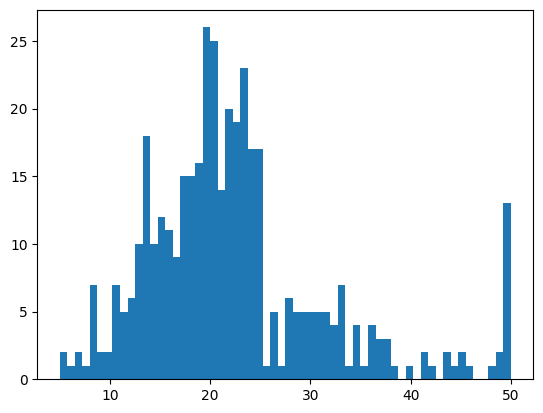

In [29]:
import matplotlib.pyplot as plt

plt.hist(np.sort(train_targets), bins=60)
plt.show()

... gaussian distribution with a fat tail (distribution biased towards extremes), RMSE/MSE should be a the optimal loss

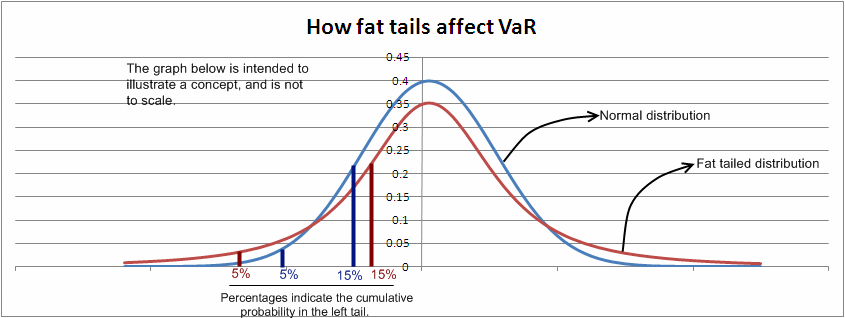

### Compare to an XGBoost model?

In [30]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [31]:
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.4,
    learning_rate=0.15,
    max_depth=10,
    alpha=15,
    n_estimators=255)

xg_reg.fit(train_data, train_targets)
preds = xg_reg.predict(test_data)

print('RMSE=%f' % (np.sqrt(mean_squared_error(test_targets, preds))))
print('MSE=%f' % (mean_squared_error(test_targets, preds)))
print('MAE=%f' % (mean_absolute_error(test_targets, preds)))
print('R^2=%f' % (r2_score(test_targets, preds)))

# for i in zip(test_targets, preds):
#   print(i)

RMSE=3.626032
MSE=13.148111
MAE=2.406246
R^2=0.842053


### Normalization helps XGBoost?

In [32]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

train_data_n = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
train_targets_n = (train_targets - train_targets.mean(axis=0)) / train_targets.std(axis=0)
test_data_n = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)
test_targets_n = (test_targets - test_targets.mean(axis=0)) / test_targets.std(axis=0)

print(train_data_n)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


### Should we normalize before or after test/train split

Intuitivelly it should be clear that if we first split then normalize the mean and std will be different between train and test dataset. 

According to this we need to normalize after splitting because mean and std from training datapoints would be used for normalizing test dataset, which constitutes data leakage, ref: https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split

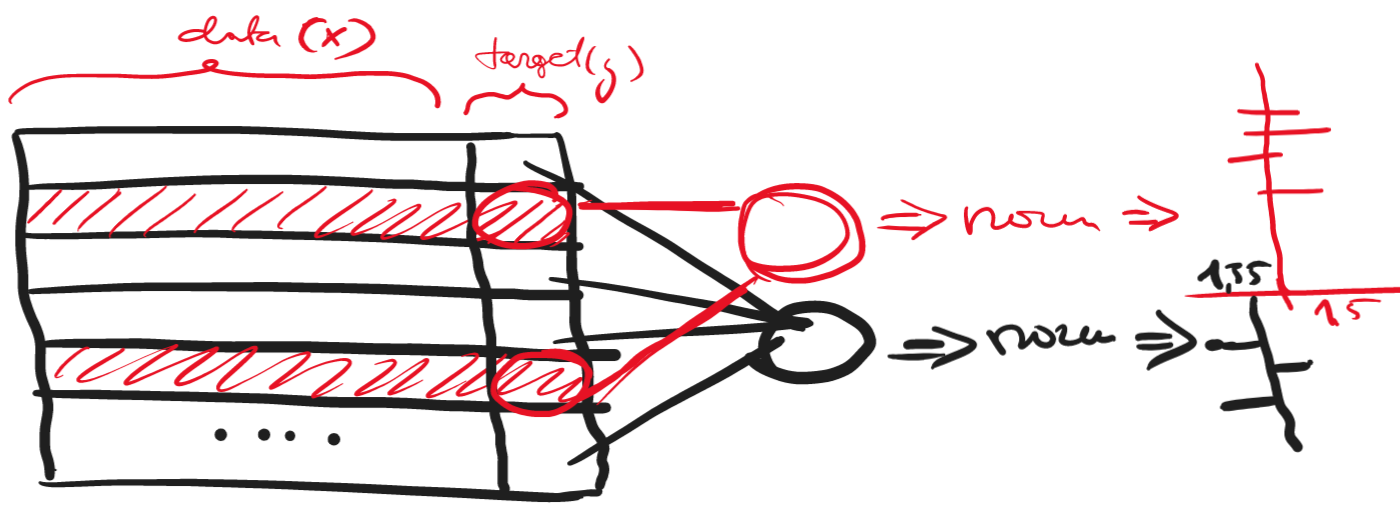

In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.4,
    learning_rate=0.15,
    max_depth=10,
    alpha=15,
    n_estimators=255
)
xg_reg.fit(train_data_n, train_targets_n)
preds_n = xg_reg.predict(test_data_n)

print('RMSE=%f' % np.sqrt(mean_squared_error(test_targets_n, preds_n)))
print('MAE=%f' % (mean_absolute_error(test_targets_n, preds_n)))

# for i in zip(test_targets_n, preds_n):
#   print(i)

RMSE=0.477878
MAE=0.354305


We can not compare RMSE / MAE or other results between normalized and denormalized variats of the network. Since we generated our predictions on test_data_n we need to denormalize it using test_data mean and std.

In [34]:
denoramalized_test_targets = test_targets_n * test_targets.std(axis=0) + test_targets.mean(axis=0)
for i in zip(np.round(denoramalized_test_targets, 2), test_targets):
    print(i)

(7.2, 7.2)
(18.8, 18.8)
(19.0, 19.0)
(27.0, 27.0)
(22.2, 22.2)
(24.5, 24.5)
(31.2, 31.2)
(22.9, 22.9)
(20.5, 20.5)
(23.2, 23.2)
(18.6, 18.6)
(14.5, 14.5)
(17.8, 17.8)
(50.0, 50.0)
(20.8, 20.8)
(24.3, 24.3)
(24.2, 24.2)
(19.8, 19.8)
(19.1, 19.1)
(22.7, 22.7)
(12.0, 12.0)
(10.2, 10.2)
(20.0, 20.0)
(18.5, 18.5)
(20.9, 20.9)
(23.0, 23.0)
(27.5, 27.5)
(30.1, 30.1)
(9.5, 9.5)
(22.0, 22.0)
(21.2, 21.2)
(14.1, 14.1)
(33.1, 33.1)
(23.4, 23.4)
(20.1, 20.1)
(7.4, 7.4)
(15.4, 15.4)
(23.8, 23.8)
(20.1, 20.1)
(24.5, 24.5)
(33.0, 33.0)
(28.4, 28.4)
(14.1, 14.1)
(46.7, 46.7)
(32.5, 32.5)
(29.6, 29.6)
(28.4, 28.4)
(19.8, 19.8)
(20.2, 20.2)
(25.0, 25.0)
(35.4, 35.4)
(20.3, 20.3)
(9.7, 9.7)
(14.5, 14.5)
(34.9, 34.9)
(26.6, 26.6)
(7.2, 7.2)
(50.0, 50.0)
(32.4, 32.4)
(21.6, 21.6)
(29.8, 29.8)
(13.1, 13.1)
(27.5, 27.5)
(21.2, 21.2)
(23.1, 23.1)
(21.9, 21.9)
(13.0, 13.0)
(23.2, 23.2)
(8.1, 8.1)
(5.6, 5.6)
(21.7, 21.7)
(29.6, 29.6)
(19.6, 19.6)
(7.0, 7.0)
(26.4, 26.4)
(18.9, 18.9)
(20.9, 20.9)
(28.1, 28.1)
(3

In [35]:
preds = preds_n * test_targets.std(axis=0) + test_targets.mean(axis=0)
print('RMSE=%f' % (np.sqrt(mean_squared_error(test_targets, preds))))
print('MAE=%f' % (mean_absolute_error(test_targets, preds)))

RMSE=4.360064
MAE=3.232615


## SOLUTION

Solution consists of several attempts to give getter scores than ones in the original

In [40]:
# ATTEMPT 1- deeper network
# Goal: to test a deeper network by adding additional hidden layer

def deeper_network_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='linear', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='linear'))
    model.add(layers.Dense(16, activation='linear'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [41]:
# Test wider model

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

k = 4
num_val_samples = len(train_data) // k
num_epochs = 65

r2_scores = []
mse_scores = []
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = deeper_network_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=2, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    preds = model.predict(val_data)
    r2_scores.append(r2_score(val_targets, preds))
    mse_scores.append(val_mse)
    all_scores.append(val_mae)

print(f"\nAll scores, MAE: {np.mean(all_scores)}")
print(f"MSE: {np.mean(mse_scores)}")
print(f"R2: {np.mean(r2_scores)}")

Processing fold # 0
4/4 [==============================] - 0s 822us/step
Processing fold # 1
4/4 [==============================] - 0s 3ms/step
Processing fold # 2
4/4 [==============================] - 0s 586us/step
Processing fold # 3
4/4 [==============================] - 0s 793us/step

All scores, MAE: 3.5949747562408447
MSE: 26.262648105621338
R2: 0.6804220243686718


**Interim result**: R2 is better (~0.68 vs ~0.84), but MAE is worse (~3.87 vs ~3.23).

In [44]:
# ATTEMPT 2 - batch size and epochs
# Goal: build on improvement from the previous attempt and change batch size and number of epochs to see if it gives further increase fo result
# Original attempt and previous attempt used 65 epochs and batch size of 2. This attempt changes these values to 45 and 4 respectively.

k = 4
num_val_samples = len(train_data) // k
num_epochs = 45  # Previously 65 were used

# Reset scores
r2_scores = []
mse_scores = []
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = deeper_network_model()
    # Change batch size from 2 to 4
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=4, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    preds = model.predict(val_data)
    r2_scores.append(r2_score(val_targets, preds))
    mse_scores.append(val_mse)
    all_scores.append(val_mae)

print(f"\nAll scores, MAE: {np.mean(all_scores)}")
print(f"MSE: {np.mean(mse_scores)}")
print(f"R2: {np.mean(r2_scores)}")

Processing fold # 0
4/4 [==============================] - 0s 941us/step
Processing fold # 1
4/4 [==============================] - 0s 601us/step
Processing fold # 2
4/4 [==============================] - 0s 3ms/step
Processing fold # 3
4/4 [==============================] - 0s 556us/step

All scores, MAE: 3.829440951347351
MSE: 28.6285400390625
R2: 0.6498452997808406


**Interim result**: R2 is better than both previous attempt and original (~0.67 vs ~0.68 vs ~0.84). MAE become better but is still worse that original (~3.60 vs ~3.87 vs ~3.23).

In [48]:
# ATTEMPT 3 - denser layers and activation function
# Goal: change activation function from 'linear' to 'relu' and use less but denser layers in the model

def denser_model():
    model = models.Sequential()
    # Attempt 1 had 4 layers. Here number of layers is reduced to 3 but the first layer is twice as dense
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(30, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


k = 4
num_val_samples = len(train_data) // k
num_epochs = 65

r2_scores = []
mse_scores = []
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = denser_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=2, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    preds = model.predict(val_data)
    r2_scores.append(r2_score(val_targets, preds))
    mse_scores.append(val_mse)
    all_scores.append(val_mae)

print(f"\nAll scores, MAE: {np.mean(all_scores)}")
print(f"MSE: {np.mean(mse_scores)}")
print(f"R2: {np.mean(r2_scores)}")

Processing fold # 0
4/4 [==============================] - 0s 487us/step
Processing fold # 1
4/4 [==============================] - 0s 525us/step
Processing fold # 2
4/4 [==============================] - 0s 451us/step
Processing fold # 3
4/4 [==============================] - 0s 4ms/step

All scores, MAE: 2.3288994431495667
MSE: 10.57882046699524
R2: 0.8661769222395508


**Final result**: Changing activation function gave by far the best MAE score (~2.32 while all previous attempts constantly had score above 3). However, R2 scores become worse and returned to levels of original attempt (~0.84) sometimes even becoming slightly worse (~0.86). Given that R2 are practically the same, but MAE is considerably better than original, final configuration could be considered as improvement of the original model.